<a href="https://colab.research.google.com/github/phoenix2000/NNFL/blob/main/NNFL_Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1q88ia09O_90sQZXMt2w8sIlNYbTWwlcY'}) 
downloaded.GetContentFile('data4.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
data1=pd.read_excel('data4.xlsx')

In [ ]:
data=data1.to_numpy()
y_column=data[:,7]
ones=np.ones((149))
#data_final=np.insert(data,0,ones,axis=1)
data_final=(data_final-np.mean(data_final))/np.std(data_final)
y_column

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [ ]:
#splitting data

np.random.shuffle(data_final)
r=int(len(data_final)*0.6)
x_train1=data_final[:r,0:8]
y_train1=y_column[:r]
x_test1=data_final[r:,0:8]
y_test1=y_column[r:]

x_train21=data_final[:int(.2*149),0:8]
y_train21=y_column[:int(.2*149)]
x_train22=data_final[int(0.6*149):int(1*149),0:8]
y_train22=y_column[int(0.6*149):int(1*149)]
x_train2=np.concatenate((x_train21,x_train22),axis=0)
y_train2=np.concatenate((y_train21,y_train22),axis=0)
x_test2=data_final[int(.2*149):int(.6*149),0:8]
y_test2=y_column[int(.2*149):int(.6*149)]

x_train31=data_final[:int(.4*149),0:8]
y_train31=y_column[:int(.4*149)]
x_train32=data_final[int(0.8*149):int(1*149),0:8]
y_train32=y_column[int(0.8*149):int(1*149)]
x_train3=np.concatenate((x_train31,x_train32),axis=0)
y_train3=np.concatenate((y_train31,y_train32),axis=0)
x_test3=data_final[int(.4*149):int(.8*149),0:8]
y_test3=y_column[int(.4*149):int(.8*149)]

x_train4=data_final[:int(.6*149),0:8]
y_train4=y_column[:int(.6*149)]
x_test4=data_final[int(.6*149):int(1*149),0:8]
y_test4=y_column[int(.6*149):int(1*149)]

x_train51=data_final[:int(.3*149),0:8]
y_train51=y_column[:int(.3*149)]
x_train52=data_final[int(0.7*149):int(1*149),0:8]
y_train52=y_column[int(0.7*149):int(1*149)]
x_train5=np.concatenate((x_train51,x_train52),axis=0)
y_train5=np.concatenate((y_train51,y_train52),axis=0)
x_test5=data_final[int(.3*149):int(.7*149),0:8]
y_test5=y_column[int(.3*149):int(.7*149)]

In [ ]:
def sigmoid(x):
  y=1/(1+np.exp(-x))
  return y
def cost_fun(x,y,w):
  m,n=x_train1.shape
  J=0
  for i in range(m):
   # J=-(1/m)*(y[i]*np.log(sigmoid(np.dot(w,x[i].T)))+(1-y[i])*(np.log(1-sigmoid(np.dot(w,x[i].T)))))
       J=(0.5/m)*(np.dot(w,x[i].T)-y[i])**2

  return J

In [ ]:
m,n=np.shape(x_train1)
w=np.zeros((1,8))
W=np.zeros((m,8))
JJ=np.zeros((m,1))
def grad_desc(x,y,alpha,iterations):
  W[0,0]=w[0,0]
  W[0,1]=w[0,1]
  W[0,2]=w[0,2]
  W[0,3]=w[0,3]
  W[0,4]=w[0,4]
  W[0,5]=w[0,5]
  W[0,6]=w[0,6]
  W[0,7]=w[0,7]
  for k in range(m):
    for i in range(m):
      for j in range(8):
        val=w[0,j]-(1/m)*alpha*(y[i]*(1-sigmoid(np.dot(x[i],w.T)))-(1-y[i])*(sigmoid(np.dot(x[i],w.T))))*x[i,j]
        w[0,j]=val
    W[k]=w
    JJ[k]=cost_fun(x,y,w)
  plt.plot(JJ)

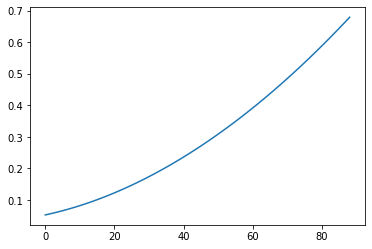

In [ ]:
grad_desc(x_train3,y_train3,0.01,100)